This notebook implements the repulsive influence based model presented in the paper by Flache et. al. 
[Flache, A., Mäs, M., Feliciani, T., Chattoe-Brown, E., Deffuant, G., Huet, S., & Lorenz, J. (2017). Models of social influence: Towards the next frontiers. Journal of Artificial Societies and Social Simulation, 20(4).]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def Opinion_Dynamics(N, mu, eps, runtime, filename, seed=42):
    # Create array to save the dynmaics
    saves = np.zeros((runtime, N))

    # Set seed
    np.random.seed(seed)

    # Create array representing agents opinions and assign them uniformly distributed
    # random opinions from -1 to 1
    agents = np.zeros(N)
    for i in range (N):
        agents[i] = np.random.uniform(-1.0, 1.0)

    # Create index array to later access agents in random order
    inds = np.arange(0, N, 1, dtype = int)

    # Start dynamics
    t = 0
    while t < runtime:
        # Determine random order in which agents are visited
        order = np.random.choice( inds, size=N, replace=False)
        # Create array that saves old opinions
        ops_old = agents

        for a in order:
            # Pick random partner != a
            par = a
            while par == a:
                par = np.random.choice( inds, size=1)
            # Perform dynamics
            weight = mu * (1 - 2*abs(ops_old[par] - ops_old[a]))
            agents[a] = ops_old[a] + weight * (ops_old[par] - ops_old[a])
            # Truncate opinions to avoid them going beyond the opinion borders [-1,1]
            if agents[a] > 1:
                agents[a] = 1
            if agents[a] < -1:
                agents[a] = -1

        # Save new opinions
        saves[t] = agents

        t += 1
    
    # Export saves to csv
    pd.DataFrame(saves).to_csv(f"D:\Daten mit Änderungen\Physik\Epidemics_Infodemics_Mobility\Data_repl\{filename}.csv")

    return saves


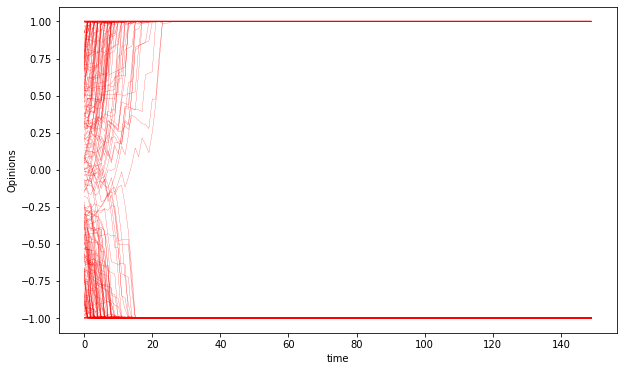

In [7]:
# Set parameters
N = 250
mu = 0.1
eps = 0.1
runtime = 150
filename = "Test_2"

# Perform simulation
data = Opinion_Dynamics(N, mu, eps, runtime, filename)

# Example plot of latest dataset
time = np.arange(0, runtime)

plt.figure(figsize=(10,6))
plt.xlabel("time")
plt.ylabel("Opinions")
for i in range (N):
    plt.plot(time, data[:,i], color='r', linewidth = '0.2')
plt.savefig("D:\Daten mit Änderungen\Physik\Epidemics_Infodemics_Mobility\Repulsive.png")